In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [4]:
df = pd.read_csv('Downloads/cluster1.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2,0.6,0.08,2.0,0.09,32.0,44.0,0.9949,3.45,0.58,10.5,5
1596,5.9,0.55,0.1,2.2,0.062,39.0,51.0,0.9951200000000001,3.52,0.76,11.2,6
1597,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.9954700000000001,3.57,0.71,10.2,5


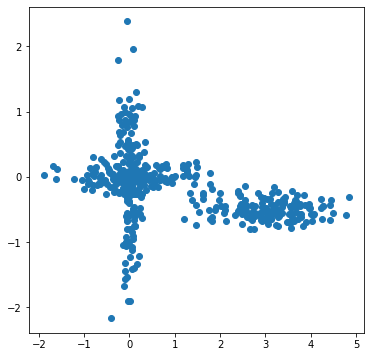

In [58]:
plt.figure(figsize=(6, 6))
plt.scatter(df[0], df[1])

Using Standard Scaler is an important data preprocessing step for most distance-based machine learning algorithms because it can have a significant impact on the performance of the algorithm. Standardization scales, or shifts, the values for each numerical feature in your dataset so that the features have a mean of 0 and standard deviation of 1

In [59]:
X_std = StandardScaler().fit_transform(df)

In [60]:
# Run local implementation of kmeans
km = KMeans(n_clusters=3, max_iter=100)
km.fit(X_std)
y_kmeans = km.predict(X_std)

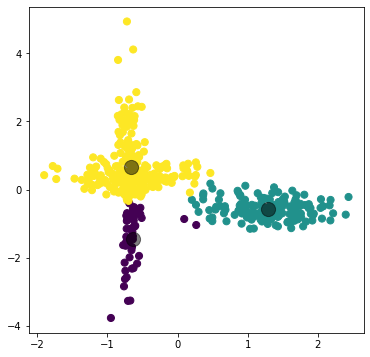

In [61]:
plt.figure(figsize=(6, 6))
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [62]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X_std)
labels = gmm.predict(X_std)

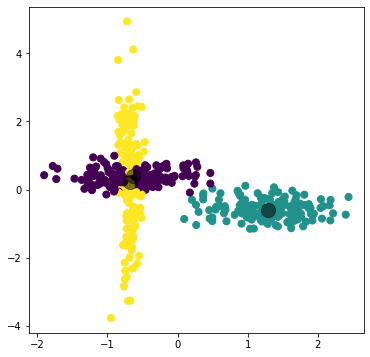

In [63]:
plt.figure(figsize=(6, 6))
plt.scatter(X_std[:, 0], X_std[:, 1],c=labels, s=50, cmap='viridis')
gmm_centers = gmm.means_
plt.scatter(gmm_centers[:, 0], gmm_centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

The two cluster are now different because while K-Means Clustering is a distance-based model, Gaussian Mixture Model is a distribution-based model. The distribution of data points in this case is not in circular form, two cluster overlap each other. K-means has tried to build a circular cluster even though the data distribution is elliptical and therefore K-Means Clustering failed to identify the right cluster. Gaussian Mixture Model performs better in this case.

In [9]:
df2 = pd.read_csv('Downloads/cluster2.csv', header = None)

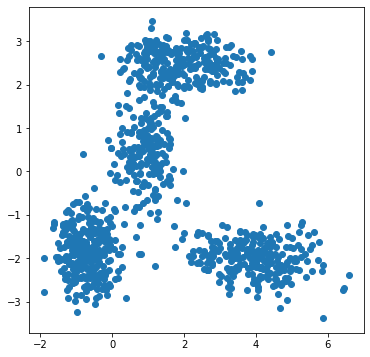

In [10]:
plt.figure(figsize=(6, 6))
plt.scatter(df2[0], df2[1])

We graph the relationship between the number of clusters and Within Cluster Sum of Squares (WCSS) then we select the number of clusters where the change in WCSS begins to level off (elbow method). WCSS is defined as the sum of the squared distance between each member of the cluster and its centroid. The curve starts flattening out at k = 4 so we will choose the number of clusters to be 4.

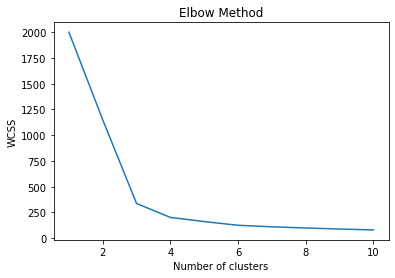

In [50]:
wcss = []
X_std2 = StandardScaler().fit_transform(df2)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_std2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [53]:
# Run local implementation of kmeans
km = KMeans(n_clusters=4, max_iter=100)
km.fit(X_std2)
y_kmeans = km.predict(X_std2)

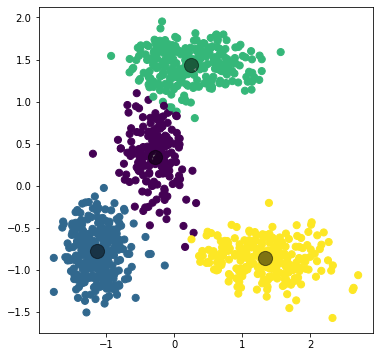

In [54]:
plt.figure(figsize=(6, 6))
plt.scatter(X_std2[:, 0], X_std2[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);